<a href="https://colab.research.google.com/github/AbdulHafidh-AI/Kelompok7_FinalProject_DataMining/blob/main/kelompok7_FInalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projek yang dikerjakan oleh kelompok 7 



# Topik Klasifikasi


<p> Kami dari wilayah Consigliere ingin melakukan klasifikasi terhadap jenis drug  </p>


<p> Projek ini dibuat di istana Consigliere 🏰</p>

<p> Anggota Kelompok Consigliere </p>

<ul>
<li>Muhammad Rudy Hidayat (2008107010002) 😷 </li>
<li>Abdul Hafidh (20081070100056) 😷 </li>
<li>Teuku Nabil Muhammad Dhuha (2008107010004) 😷</li>
</ul>



<p> Tujuan dari projek ini adalah untuk mengklasifikasi obat-obatan dengan golongannya masing-masing  </p>

<p> Berikut ini adalah metode klasifikasi yang kami gunakan </p>

<ul>
<li> KNN (K-Nearest Neighbour) </li>
<li> Naive Bayessian</li>
<li> Decision Tree </li>
<li> SVM </li>
</ul>




# 1. Exploratotry Data Analysis


<p> Exploratory Data Analysis disini bertujuan dalam melihat segala hal tentang data yang dimana kita dapat mengetahui apakah terdapat data null,banyak outlier,noisy dan lain -lain </p>

In [82]:
# Import library 
import pandas as pd

In [83]:
# Membaca dataframe

df = pd.read_csv("https://raw.githubusercontent.com/Teuku-Nabil/Datasests/main/drug200.csv")

In [84]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [85]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [86]:
df.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

<p> Berikut ini adalah atribut pada dataset: </p>

<ol>
<li> Age </li>
<li> Sex </li>
<li> BP </li>
<li> Cholesterol </li>
<li> Na_to_K </li>
</ol>

<p> Untuk class labelnya adalah atribut Drug </p>

<p> Berikut ini adalah deskripsi dari setiap drug (Class Label) : </p>


1.   DrugA -->  mengobati tekanan darah tinggi
2.   DrugB -->  terapi tekanan darah tinggi
3.   DrugC -->  mengobati tekanan darah tinggi
4.   DrugX -->  efeknya menenangkan rasa cemas
5.   DrugY -->  meningkatkan tekanan darah


In [87]:
df['Sex'].unique()

array(['F', 'M'], dtype=object)

In [88]:
df['BP'].unique()

array(['HIGH', 'LOW', 'NORMAL'], dtype=object)

In [89]:
df['Cholesterol'].unique()

array(['HIGH', 'NORMAL'], dtype=object)

In [90]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

<p> Dapat dilihat bahwa pada dataset kita tidak ada yang NULL sehingga kita tidak perlu mengisi atau menghilangkan data yang tidak ada, Maka dapat dilihat bahwa dataset kita sudah bagus </p>

<p> Sebelum kita membangun model alangkah baiknya jika kita melakukan teknik Label Encoding utnuk data yang bertipe kategorik agar library sklearn dapat dengan mudah memprosesnya tanpa adanya error </p>


<p> Di tahap ini kita seperti melakukan mapping untuk ketiga atribut yakni atribut Sex,BP, dan Cholesterol <P>


In [91]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [92]:
import category_encoders as ce
import pandas as pd
 

# Melakukan teknik label encoder untuk 3 atribut yaitu atribut BP, Atribut Cholesterol, dan Atribut Sex 
"""
None --> 0
LOW --> 1
NORMAL --> 2
HIGH --> 3

"""
encoder_BP = ce.OrdinalEncoder(cols=['BP'],return_df=True,
                           mapping=[{'col':'BP',
                                    'mapping':{'None':0,'LOW':1,'NORMAL':2,'HIGH':3}}])


"""
NORMAL --> 1
HIGH --> 2
"""

encoder_Cholesterol = ce.OrdinalEncoder(cols=['Cholesterol'],return_df=True,
                           mapping=[{'col':'Cholesterol',
                                    'mapping':{'NORMAL':1,'HIGH':2}}])

"""
F --> 1
M --> 2

"""

encoder_Sex = ce.OrdinalEncoder(cols=['Sex'],return_df=True,
                           mapping=[{'col':'Sex',
                                    'mapping':{'F':1,'M':2}}])

df = encoder_BP.fit_transform(df)

df = encoder_Cholesterol.fit_transform(df)

df = encoder_Sex.fit_transform(df)


df






,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,1,3,2,25.355,DrugY
1,47,2,1,2,13.093,drugC
2,47,2,1,2,10.114,drugC
3,28,1,2,2,7.798,drugX
4,61,1,1,2,18.043,DrugY
...,...,...,...,...,...,...
195,56,1,1,2,11.567,drugC
196,16,2,1,2,12.006,drugC
197,52,2,2,2,9.894,drugX
198,23,2,2,1,14.020,drugX


# 2. Split data training and Testing

In [93]:
# Pada tahap ini kita akan membagi data training sebanyak 70 % dan data testing sebanyak 30 %
from sklearn.model_selection import train_test_split


# Memisahkan Atribut dan label
X = df.drop('Drug', axis = 1)
y = df['Drug']

# melakukan pemisahan data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 3. Metode Klasifikasi

In [94]:
# karena ada banyak model yang kita bangun alangkah baiknya jika kita membuat variabel untuk menampung score pada model yang kita buat
metode = []
score = []
result_dict = {
    "metode" : metode,
    "score" : score

}

## 3.1 Decision Tree

In [95]:
# Membangun model Decision Tree
from sklearn.tree import DecisionTreeClassifier

# Membuat Variabel baru untuk training agar tidak tertimpa dengan variabel training yang awal
X_train_modelDecisionTree = X_train 
y_train_modelDecisionTree = y_train


modelDecisionTree =DecisionTreeClassifier(max_depth=3)
modelDecisionTree.fit(X_train_modelDecisionTree, y_train_modelDecisionTree)

DecisionTreeClassifier(max_depth=3)

## 3.1.1 Membuat Decision Tree

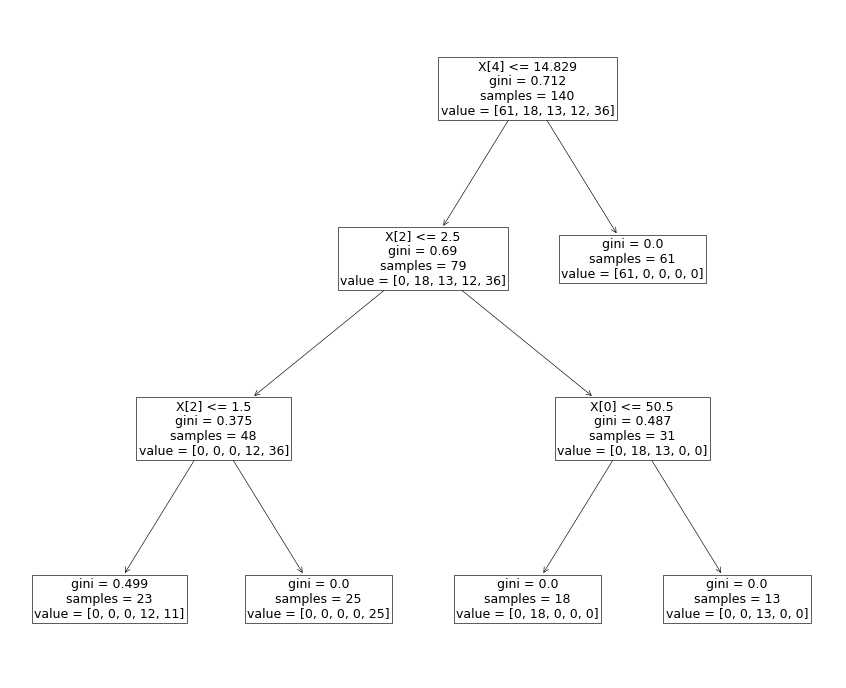

In [96]:
import matplotlib.pyplot as plt
from sklearn import tree

plt.rcParams['figure.dpi'] = 45
plt.subplots(figsize=(24,20))
tree.plot_tree(modelDecisionTree, fontsize=20)
plt.show()

## 3.2 Naive Bayessian 

In [97]:
from sklearn.naive_bayes import GaussianNB

# Membuat Variabel baru untuk training agar tidak tertimpa dengan variabel training yang awal
X_train_modelNaiveBayessian = X_train 
y_train_modelNaiveBayessian = y_train

# Membuat variabel baru untuk testing agar tidak tertimpa oleh variabel awal
X_test_modelNaiveBayessian = X_test
y_test_modelNaiveBayessian = y_test

modelNaiveBayessian = GaussianNB()
modelNaiveBayessian.fit(X_train_modelNaiveBayessian, y_train_modelNaiveBayessian)

y_pred_modelNaiveBayessian = modelNaiveBayessian.predict(X_test_modelNaiveBayessian)

## 3.3 Support Vector Machine

In [98]:
# logistic regression for multi-class classification using a one-vs-rest
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
#Variabel Baru
X_train_modelSVM = X_train 
y_train_modelSVM = y_train
X_test_modelSVM = X_test
y_test_modelSVM = y_test
# define model
modelSVM = LogisticRegression()
model1=LogisticRegression().fit(X_test_modelSVM, y_test_modelSVM)
# define the ovr strategy
ovr = OneVsRestClassifier(modelSVM)
# fit model
ovr.fit(X, y)
# make predictions
yhat = ovr.predict(X)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


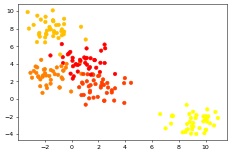

In [99]:
#Membuat SVM
from sklearn.datasets import make_blobs
ovr, yhat = make_blobs(n_samples=200, centers=5,
                  random_state=0, cluster_std=1)

plt.scatter(ovr[:, 0], ovr[:, 1], c=yhat, s=30, cmap='autumn');

##3.4 KNN (K - Nearest Neighbour)

In [100]:
# Mengaktifkan package untuk mengubah skala data
from sklearn.preprocessing import StandardScaler

# Membuat Variabel baru untuk training agar tidak tertimpa dengan variabel training yang awal
X_train_modelknn = X_train 
y_train_modelknn = y_train

# Membuat variabel baru untuk testing agar tidak tertimpa oleh variabel awal
X_test_modelknn = X_test
y_test_modelknn = y_test

scaler = StandardScaler()
scaler.fit(X_train_modelknn)

X_train_modelknn = scaler.transform(X_train_modelknn)
X_test_modelknn = scaler.transform(X_test_modelknn)

In [101]:
# Mengaktifkan package untuk klasifikasi KNN dari sklearn
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier (n_neighbors=4)

In [102]:
# Mengaktifkan fungsi klasifikasi dan memasukkan data training 
KNN.fit(X_train_modelknn, y_train_modelknn)

KNeighborsClassifier(n_neighbors=4)

In [103]:
# Menentukan prediksi
y_pred_modelKNN = KNN.predict (X_test_modelknn)
y_pred_modelKNN

array(['drugC', 'drugX', 'DrugY', 'DrugY', 'DrugY', 'drugX', 'drugX',
       'drugX', 'DrugY', 'drugX', 'drugA', 'DrugY', 'DrugY', 'drugX',
       'drugB', 'drugC', 'DrugY', 'DrugY', 'drugX', 'drugA', 'DrugY',
       'drugX', 'drugB', 'drugX', 'DrugY', 'drugX', 'drugX', 'DrugY',
       'DrugY', 'DrugY', 'drugX', 'drugC', 'drugA', 'drugX', 'DrugY',
       'DrugY', 'drugX', 'DrugY', 'DrugY', 'DrugY', 'drugA', 'drugA',
       'DrugY', 'drugX', 'DrugY', 'drugX', 'drugX', 'drugX', 'DrugY',
       'drugB', 'DrugY', 'drugB', 'DrugY', 'DrugY', 'drugC', 'DrugY',
       'drugX', 'drugX', 'DrugY', 'drugB'], dtype=object)

In [104]:
# Menentukan probabilitas prediksi
KNN.predict_proba(X_test_modelknn)

array([[0.  , 0.  , 0.  , 0.5 , 0.5 ],
       [0.  , 0.  , 0.  , 0.25, 0.75],
       [0.75, 0.  , 0.  , 0.25, 0.  ],
       [1.  , 0.  , 0.  , 0.  , 0.  ],
       [0.75, 0.  , 0.  , 0.  , 0.25],
       [0.25, 0.  , 0.  , 0.  , 0.75],
       [0.  , 0.25, 0.  , 0.  , 0.75],
       [0.25, 0.  , 0.  , 0.  , 0.75],
       [0.5 , 0.  , 0.  , 0.5 , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 1.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  , 0.  , 0.  ],
       [0.25, 0.  , 0.  , 0.  , 0.75],
       [0.25, 0.  , 0.75, 0.  , 0.  ],
       [0.25, 0.  , 0.  , 0.75, 0.  ],
       [1.  , 0.  , 0.  , 0.  , 0.  ],
       [0.5 , 0.  , 0.  , 0.  , 0.5 ],
       [0.  , 0.  , 0.  , 0.  , 1.  ],
       [0.25, 0.75, 0.  , 0.  , 0.  ],
       [0.75, 0.25, 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 1.  ],
       [0.  , 0.  , 0.5 , 0.  , 0.5 ],
       [0.25, 0.  , 0.  , 0.  , 0.75],
       [1.  , 0.  , 0.  , 0.  , 0.  ],
       [0.25, 0.  , 0.  ,

# 4. Classification Report


## 4.1 Decision Tree

In [105]:
from sklearn.metrics import classification_report

# Membuat variabel baru untuk testing agar tidak tertimpa oleh variabel awal
X_test_modelDecisionTree = X_test
y_test_modelDecisionTree = y_test

y_pred_modelDecisionTree = modelDecisionTree.predict(X_test_modelDecisionTree)

print(classification_report(y_test_modelDecisionTree, y_pred_modelDecisionTree))


              precision    recall  f1-score   support

       DrugY       1.00      1.00      1.00        30
       drugA       1.00      1.00      1.00         5
       drugB       1.00      1.00      1.00         3
       drugC       0.36      1.00      0.53         4
       drugX       1.00      0.61      0.76        18

    accuracy                           0.88        60
   macro avg       0.87      0.92      0.86        60
weighted avg       0.96      0.88      0.90        60



## 4.1.1 Visualiasasi Confusion Matrix dari Model Decision Tree

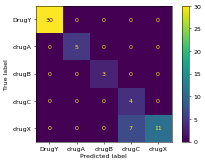

In [106]:
import matplotlib.pyplot as plt
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test_modelDecisionTree,y_pred_modelDecisionTree, labels= modelDecisionTree.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=modelDecisionTree.classes_)

disp.plot()
plt.show()


In [107]:
# Mencetak Akurasi, precision, recall, dan f1-score untuk model decision tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Dengan menggunakan Decision Tree maka didapat score berikut ini: ")

print('Akurasi: ', accuracy_score(y_test_modelDecisionTree, y_pred_modelDecisionTree))
print('Precision: ', precision_score(y_test_modelDecisionTree, y_pred_modelDecisionTree, average='weighted'))
print('Recall: ', recall_score(y_test_modelDecisionTree, y_pred_modelDecisionTree, average='weighted'))
print('F1-Score: ', f1_score(y_test_modelDecisionTree, y_pred_modelDecisionTree, average='weighted'))


metode.append('Decision Tree')
score.append("{:.2%}".format(accuracy_score(y_test_modelDecisionTree, y_pred_modelDecisionTree)))


Dengan menggunakan Decision Tree maka didapat score berikut ini: 
Akurasi:  0.8833333333333333
Precision:  0.9575757575757575
Recall:  0.8833333333333333
F1-Score:  0.8964750957854406


## 4.2 Naive Bayessian

In [108]:
from sklearn.metrics import accuracy_score
print(classification_report(y_test_modelNaiveBayessian, y_pred_modelNaiveBayessian))

NaiveAcc = accuracy_score(y_pred_modelNaiveBayessian,y_test_modelNaiveBayessian)



              precision    recall  f1-score   support

       DrugY       1.00      0.83      0.91        30
       drugA       0.71      1.00      0.83         5
       drugB       0.75      1.00      0.86         3
       drugC       0.67      1.00      0.80         4
       drugX       1.00      1.00      1.00        18

    accuracy                           0.92        60
   macro avg       0.83      0.97      0.88        60
weighted avg       0.94      0.92      0.92        60



## 4.2.1 Visualisasi Confusion Matrix dari model Naive Bayessian

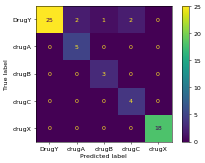

In [109]:
import matplotlib.pyplot as plt
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test_modelNaiveBayessian,y_pred_modelNaiveBayessian, labels= modelNaiveBayessian.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=modelNaiveBayessian.classes_)

disp.plot()
plt.show()


In [110]:
# Mencetak Akurasi, precision, recall, dan f1-score untuk model decision tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Dengan menggunakan Naive Bayessian maka didapat score berikut ini: ")

print('Akurasi: ', accuracy_score(y_test_modelNaiveBayessian, y_pred_modelNaiveBayessian))
print('Precision: ', precision_score(y_test_modelNaiveBayessian, y_pred_modelNaiveBayessian, average='weighted'))
print('Recall: ', recall_score(y_test_modelNaiveBayessian, y_pred_modelNaiveBayessian, average='weighted'))
print('F1-Score: ', f1_score(y_test_modelNaiveBayessian, y_pred_modelNaiveBayessian, average='weighted'))

metode.append("Naive Bayessian")
score.append("{:.2%}".format(accuracy_score(y_test_modelNaiveBayessian, y_pred_modelNaiveBayessian)))


Dengan menggunakan Naive Bayessian maka didapat score berikut ini: 
Akurasi:  0.9166666666666666
Precision:  0.9414682539682538
Recall:  0.9166666666666666
F1-Score:  0.9201803751803752


## 4.3 KNN

In [111]:
# Print hasil prediksi
print(classification_report(y_test_modelknn, y_pred_modelKNN))

              precision    recall  f1-score   support

       DrugY       0.85      0.73      0.79        30
       drugA       0.60      0.60      0.60         5
       drugB       0.60      1.00      0.75         3
       drugC       1.00      1.00      1.00         4
       drugX       0.75      0.83      0.79        18

    accuracy                           0.78        60
   macro avg       0.76      0.83      0.79        60
weighted avg       0.79      0.78      0.78        60



In [112]:
# Import package untuk melihat keakuratan data prediksi
from sklearn.metrics import classification_report, confusion_matrix

# Menampilkan matriks hasil prediksi
print(confusion_matrix(y_test_modelknn, y_pred_modelKNN))

[[22  2  1  0  5]
 [ 2  3  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0  4  0]
 [ 2  0  1  0 15]]


### 4.3.1 Visualisasi Confusion Matrix KNN

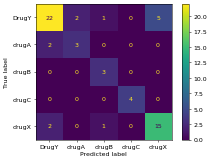

In [113]:
import matplotlib.pyplot as plt
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test_modelknn,y_pred_modelKNN, labels= KNN.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=KNN.classes_)

disp.plot()
plt.show()


In [114]:
# Mencetak Akurasi, precision, recall, dan f1-score untuk model decision tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Dengan menggunakan Naive Bayessian maka didapat score berikut ini: ")

print('Akurasi: ', accuracy_score(y_test_modelknn, y_pred_modelKNN))
print('Precision: ', precision_score(y_test_modelknn, y_pred_modelKNN, average='weighted'))
print('Recall: ', recall_score(y_test_modelknn, y_pred_modelKNN, average='weighted'))
print('F1-Score: ', f1_score(y_test_modelknn, y_pred_modelKNN, average='weighted'))

metode.append("KNN")
score.append("{:.2%}".format(accuracy_score(y_test_modelknn, y_pred_modelKNN)))


Dengan menggunakan Naive Bayessian maka didapat score berikut ini: 
Akurasi:  0.7833333333333333
Precision:  0.7947435897435897
Recall:  0.7833333333333333
F1-Score:  0.7838659147869673


## 4.4 SVM

In [115]:
from sklearn.metrics import classification_report
y_pred_modelSVM=model1.predict(X_test_modelSVM)

print(classification_report(y_test_modelSVM, y_pred_modelSVM))

              precision    recall  f1-score   support

       DrugY       0.94      1.00      0.97        30
       drugA       1.00      1.00      1.00         5
       drugB       1.00      0.33      0.50         3
       drugC       0.67      0.50      0.57         4
       drugX       0.84      0.89      0.86        18

    accuracy                           0.90        60
   macro avg       0.89      0.74      0.78        60
weighted avg       0.90      0.90      0.89        60



### 4.4.1 Visualisasi Confusion Matrix SVM

Text(69.0, 0.5, 'Truth')

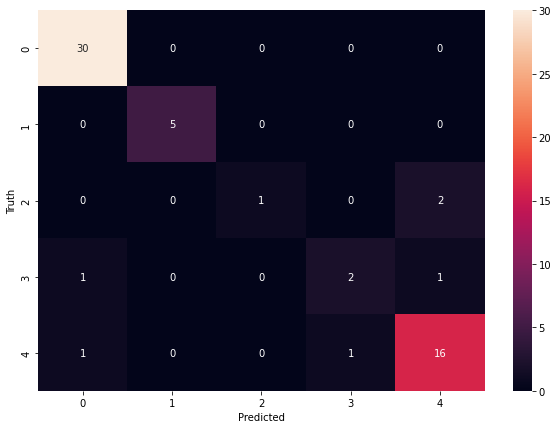

In [116]:
import seaborn as sn

#mengimplementasikan testing data dan hasil prediksi dalam confusion matrix
cm = confusion_matrix(y_test_modelSVM, y_pred_modelSVM)
 
#membuat plotting confusion matrix
%matplotlib inline
plt.figure (figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [117]:
# Mencetak Akurasi, precision, recall, dan f1-score untuk model decision tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Dengan menggunakan Naive Bayessian maka didapat score berikut ini: ")

print('Akurasi: ', accuracy_score(y_test_modelSVM, y_pred_modelSVM))
print('Precision: ', precision_score(y_test_modelSVM, y_pred_modelSVM, average='weighted'))
print('Recall: ', recall_score(y_test_modelSVM, y_pred_modelSVM, average='weighted'))
print('F1-Score: ', f1_score(y_test_modelSVM, y_pred_modelSVM, average='weighted'))

metode.append("SVM")
score.append("{:.2%}".format(accuracy_score(y_test_modelSVM, y_pred_modelSVM)))


Dengan menggunakan Naive Bayessian maka didapat score berikut ini: 
Akurasi:  0.9
Precision:  0.8991593567251461
Recall:  0.9
F1-Score:  0.8897589986299664


# 5. Kesimpulan

In [118]:
df_result = pd.DataFrame(result_dict)

df_result

,metode,score
0,Decision Tree,88.33%
1,Naive Bayessian,91.67%
2,KNN,78.33%
3,SVM,90.00%


In [119]:
df_result['metode']

0      Decision Tree
1    Naive Bayessian
2                KNN
3                SVM
Name: metode, dtype: object

In [120]:
df_result['score']

0    88.33%
1    91.67%
2    78.33%
3    90.00%
Name: score, dtype: object

<function matplotlib.pyplot.show(*args, **kw)>

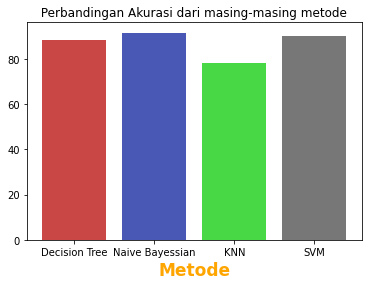

In [125]:

import numpy as np
import matplotlib.pyplot as plt

labelChart = df_result['metode']
scoreChart = df_result['score'].str.replace('%','').astype(np.float64) # Convert String to float
colors=['#C94845', '#4958B5', '#49D845', '#777777']

plt.title(" Perbandingan Akurasi dari masing-masing metode ")
plt.xlabel('Metode', fontweight='bold', color = 'orange', fontsize='17', horizontalalignment='center')
plt.bar(labelChart, scoreChart, color=colors)
plt.show




